<a href="https://colab.research.google.com/github/BabaGeorge22/MAT-421/blob/main/HWH2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module H Homework: Section 22.4-22.6 - George Tome

22.4 Numerical Error and Instability

There are two main factors:

. How closely the numerical method approximates the exact solution.


. Whether errors diminish or amplify as calculations progress.

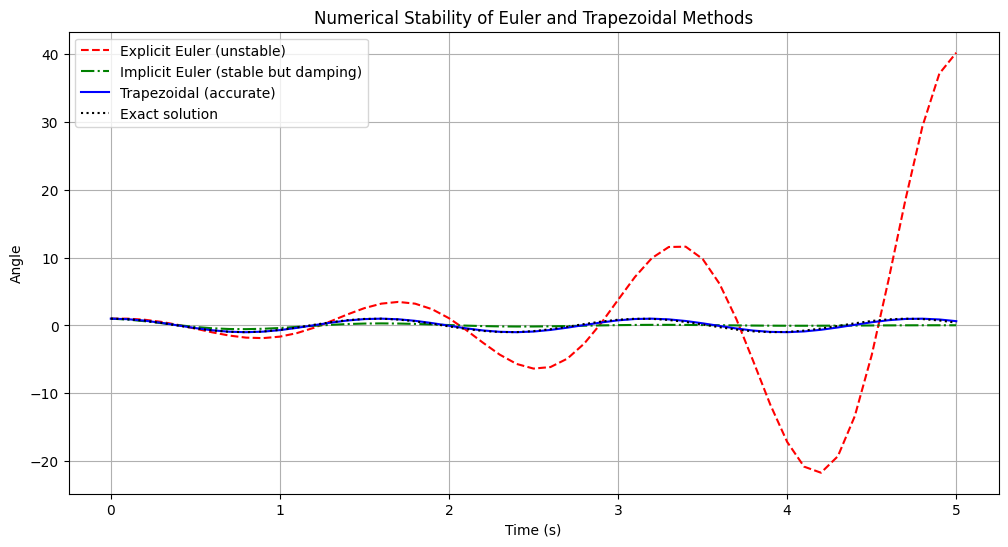

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

#Parameters
h = 0.1
t = np.arange(0, 5.1, h)
omega = 4  #sqrt(g/l)
s0 = np.array([1, 0])  #angle=1, velocity=0

#Setup
exp_matrix = np.array([[1, h], [-omega**2 * h, 1]])
imp_matrix = inv(np.array([[1, -h], [omega**2 * h, 1]]))
trap_matrix = inv(np.array([[1, -h/2], [omega**2 * h/2, 1]])) @ np.array([[1, h/2], [-omega**2 * h/2, 1]])

#solutions
exp_sol, imp_sol, trap_sol = [s0], [s0], [s0]

#Numerical integration
for _ in range(len(t)-1):
    exp_sol.append(exp_matrix @ exp_sol[-1])
    imp_sol.append(imp_matrix @ imp_sol[-1])
    trap_sol.append(trap_matrix @ trap_sol[-1])

exp_sol, imp_sol, trap_sol = np.array(exp_sol), np.array(imp_sol), np.array(trap_sol)

#Plot solutions
plt.figure(figsize=(12, 6))
plt.plot(t, exp_sol[:,0], 'r--', label='Explicit Euler (unstable)')
plt.plot(t, imp_sol[:,0], 'g-.', label='Implicit Euler (stable but damping)')
plt.plot(t, trap_sol[:,0], 'b-', label='Trapezoidal (accurate)')
plt.plot(t, np.cos(omega*t), 'k:', label='Exact solution')
plt.title('Numerical Stability of Euler and Trapezoidal Methods')
plt.xlabel('Time (s)')
plt.ylabel('Angle')
plt.grid()
plt.legend()
plt.show()


. Explicit Euler diverges quickly.

. Implicit Euler is stable but introduces some damping.

. Trapezoidal method closely matches the exact solution, which shows good.

22.5 Predictor-Corrector Methods

Two main things occure in this method:


- Estimates the next solution point using an explicit method.


- Refines this prediction by re-evaluating the slope at a predicted midpoint, achieving better accuracy.

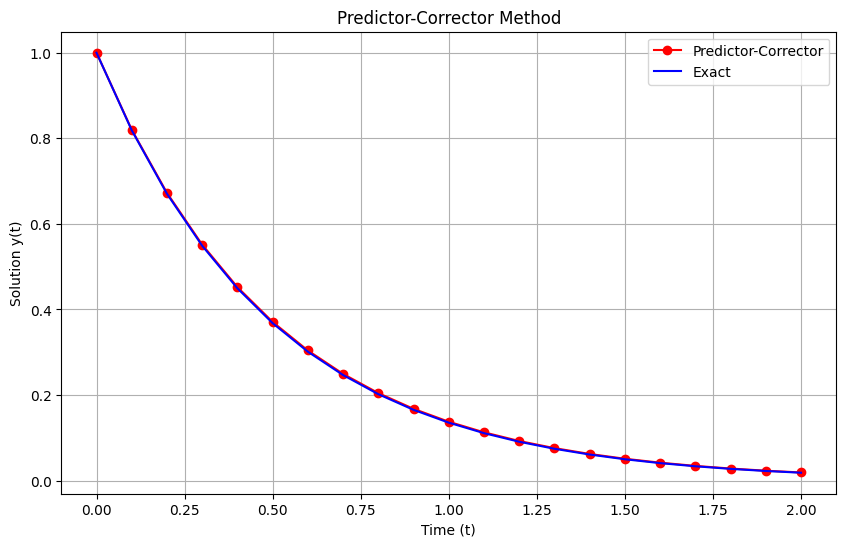

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#dy/dt = -2y, y = e^(-2t)
f = lambda t, y: -2*y

#Parameters
h = 0.1
t = np.arange(0, 2+h, h)
y_pred_corr = np.zeros(len(t))
y_pred_corr[0] = 1  #condition y(0)=1

#Predictor loop
for i in range(len(t)-1):
    #Predictor step
    y_mid = y_pred_corr[i] + (h/2)*f(t[i], y_pred_corr[i])
    #Corrector step
    y_pred_corr[i+1] = y_pred_corr[i] + h*f(t[i]+h/2, y_mid)

#Exact solution
y_exact = np.exp(-2*t)

#Plot
plt.figure(figsize=(10, 6))
plt.plot(t, y_pred_corr, 'ro-', label='Predictor-Corrector')
plt.plot(t, y_exact, 'b-', label='Exact')
plt.title('Predictor-Corrector Method')
plt.xlabel('Time (t)')
plt.ylabel('Solution y(t)')
plt.legend()
plt.grid()
plt.show()


The predictor corrector method improves accuracy compared to a simple Euler approach.

22.6 Runge-Kutta Methods and Python ODE Solvers

The Runge-Kutta methods, are among the most accurate and widely used numerical techniques for solving ODEs without needing higher order derivatives explicitly. Python provides built in ODE solvers.

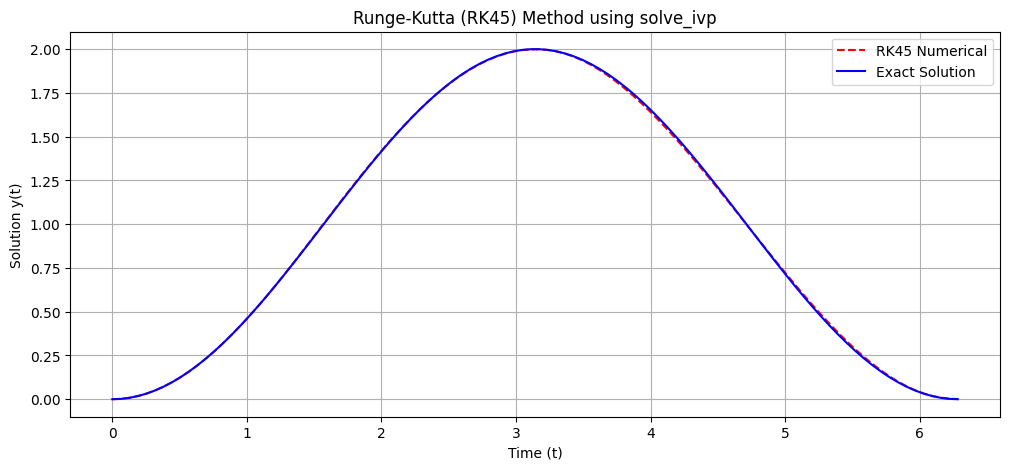

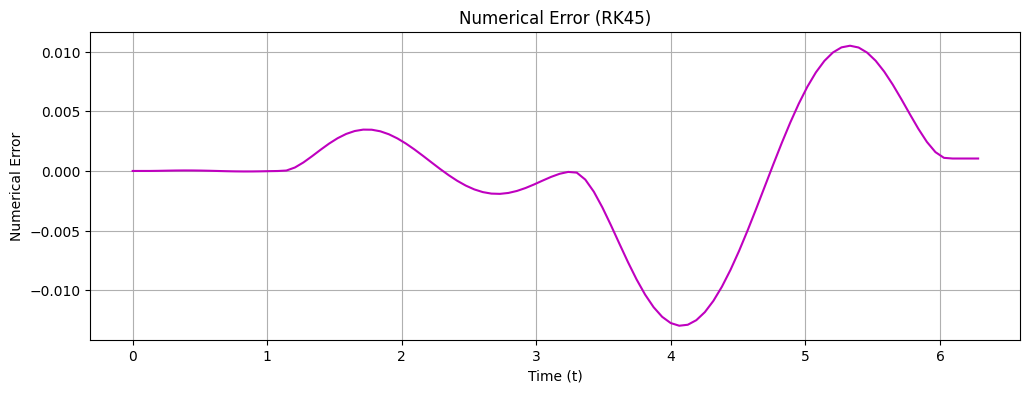

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#ODE dy/dt = sin(t), y(0)=0
f = lambda t, y: np.sin(t)

#Time interval
t_span = [0, 2*np.pi]
t_eval = np.linspace(0, 2*np.pi, 100)

#solve_ivp with RK45
sol = solve_ivp(f, t_span, [0], method='RK45', t_eval=t_eval)

#solution
y_exact = 1 - np.cos(t_eval)

#Plot numerical vs exact solution
plt.figure(figsize=(12,5))
plt.plot(sol.t, sol.y[0], 'r--', label='RK45 Numerical')
plt.plot(t_eval, y_exact, 'b', label='Exact Solution')
plt.title('Runge-Kutta (RK45) Method using solve_ivp')
plt.xlabel('Time (t)')
plt.ylabel('Solution y(t)')
plt.legend()
plt.grid(True)
plt.show()

# Plot error
plt.figure(figsize=(12,4))
plt.plot(sol.t, sol.y[0] - y_exact, 'm-')
plt.title('Numerical Error (RK45)')
plt.xlabel('Time (t)')
plt.ylabel('Numerical Error')
plt.grid(True)
plt.show()

The RK45 solver in Python provides an accurate approximation of the solution with very small errors. Adjusting rtol and atol can further refine this accuracy.